### Importing Libraries

In [1]:
import os
%matplotlib inline 
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

### Setting the directory

In [2]:
os.chdir("C://Users/user/Desktop/class_practice/Unsupervised_learning_week_7/kaggle_competetion/")

## 1) Train(Sales) and Test Data

In [3]:
sales_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
sales_data.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [5]:
test_data.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


#### Changing the column names by removing the unnecessary characters

In [6]:
column_names_sales = ['Year', 'Month','ProductCategory','Sales']

sales_data.columns = column_names_sales
test_data.columns = column_names_sales

#### Replacing the numerical data of the 'Month' column with corresponding month names

In [7]:
sales_data.Month.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
test_data.Month.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

#### Merging the data in the columns 'Year' and 'Month' to a single column 'Year_Month' and dropping 'Year' & 'Month'

By doing this, we can have a common column in all the three data frames (the other two dataframes contains the column 'Year_Month')

In [8]:
sales_data['Year_Month'] = sales_data['Year'].astype(str) + ' - ' + sales_data['Month']
sales_data.drop(['Year', 'Month'], axis=1, inplace=True)

In [9]:
test_data['Year_Month'] = test_data['Year'].astype(str) + ' - ' + test_data['Month']
test_data.drop(['Year', 'Month'], axis=1, inplace=True)

In [10]:
sales_data.tail()

,ProductCategory,Sales,Year_Month
211,MenClothing,803.0,2014 - Nov
212,OtherClothing,1468.0,2014 - Nov
213,WomenClothing,5664.0,2014 - Dec
214,MenClothing,1070.0,2014 - Dec
215,OtherClothing,1967.0,2014 - Dec


#### Dropping the response column('Sales')

In [11]:
test_data = test_data.drop(test_data.columns[[1]], axis=1)

In [12]:
test_data.head()

,ProductCategory,Year_Month
0,WomenClothing,2015 - Jan
1,MenClothing,2015 - Jan
2,OtherClothing,2015 - Jan
3,WomenClothing,2015 - Feb
4,MenClothing,2015 - Feb


### Missing Values Imputation

#### Seperating the dataframe into three parts based on the 'ProductCategory'

In [13]:
women_df_train = sales_data[sales_data['ProductCategory'] == 'WomenClothing']
men_df_train = sales_data[sales_data['ProductCategory'] == 'MenClothing']
other_df_train = sales_data[sales_data['ProductCategory'] == 'OtherClothing']

women_df_test = test_data[test_data['ProductCategory'] == 'WomenClothing']
men_df_test = test_data[test_data['ProductCategory'] == 'MenClothing']
other_df_test = test_data[test_data['ProductCategory'] == 'OtherClothing']

#### Checking the number of missing values in each division

In [14]:
women_df_train.isna().apply(pd.value_counts)

,ProductCategory,Sales,Year_Month
False,72.0,69,72.0
True,NaN,3,NaN


In [15]:
men_df_train.isna().apply(pd.value_counts)

,ProductCategory,Sales,Year_Month
False,72.0,68,72.0
True,NaN,4,NaN


In [16]:
other_df_train.isna().apply(pd.value_counts)

,ProductCategory,Sales,Year_Month
False,72.0,67,72.0
True,NaN,5,NaN


In [17]:
women_df_test.isna().apply(pd.value_counts)

,ProductCategory,Year_Month
False,12,12


In [18]:
men_df_test.isna().apply(pd.value_counts)

,ProductCategory,Year_Month
False,12,12


In [19]:
other_df_test.isna().apply(pd.value_counts)

,ProductCategory,Year_Month
False,12,12


### Using the interpolate method to impute missing values

In [20]:
women_df_train = women_df_train.interpolate()
men_df_train = men_df_train.interpolate()
other_df_train = other_df_train.interpolate()

#### Re-checking the number of missing values after the imputation

In [21]:
women_df_train.isna().apply(pd.value_counts)

,ProductCategory,Sales,Year_Month
False,72,72,72


In [22]:
men_df_train.isna().apply(pd.value_counts)

,ProductCategory,Sales,Year_Month
False,72,72,72


In [23]:
other_df_train.isna().apply(pd.value_counts)

,ProductCategory,Sales,Year_Month
False,72,72,72


#### Merging the divisions and sorted based on the index

In [24]:
frames = [women_df_train , men_df_train, other_df_train]

train_sales = pd.concat(frames)
train_sales = train_sales.sort_index
train_sales = train_sales()

In [25]:
frames = [women_df_test , men_df_test, other_df_test]

test_sales = pd.concat(frames)
test_sales = test_sales.sort_index
test_sales = test_sales()

In [26]:
train_sales.head()

,ProductCategory,Sales,Year_Month
0,WomenClothing,1755.0,2009 - Jan
1,MenClothing,524.0,2009 - Jan
2,OtherClothing,936.0,2009 - Jan
3,WomenClothing,1729.0,2009 - Feb
4,MenClothing,496.0,2009 - Feb


In [27]:
test_sales.head()

,ProductCategory,Year_Month
0,WomenClothing,2015 - Jan
1,MenClothing,2015 - Jan
2,OtherClothing,2015 - Jan
3,WomenClothing,2015 - Feb
4,MenClothing,2015 - Feb


## 2) Weather Data

#### Reading the weather data(excel format)

In [28]:
file = pd.ExcelFile('weather.xlsx')

In [29]:
file.sheet_names

['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

#### Assigning each sheet to a separate data frame

In [30]:
weather_2009 = pd.read_excel(file, sheet_name ="2009")
weather_2010 = pd.read_excel(file, sheet_name ="2010")
weather_2011 = pd.read_excel(file, sheet_name ="2011")
weather_2012 = pd.read_excel(file, sheet_name ="2012")
weather_2013 = pd.read_excel(file, sheet_name ="2013")
weather_2014 = pd.read_excel(file, sheet_name ="2014")
weather_2015 = pd.read_excel(file, sheet_name ="2015")
weather_2016 = pd.read_excel(file, sheet_name ="2016")

### Data Preprocessing

#### Fixing the column names

In [31]:
column_names_weather = ['Year', 'Month', 'Day', 'Temp_high_C', 'Temp_avg_C',
       'Temp_low_C', 'Dew_Point_high_C', 'Dew_Point_avg_C',
       'Dew_Point_low_C', 'Humidity_prcnt_high', 'Humidity_prcnt_avg',
       'Humidity_prcnt_low', 'Sea_Level_Press_hPa_high',
       'Sea_Level_Press_hPa_avg', 'Sea_Level_Press_hPa_low',
       'Visibility_km_high', 'Visibility_km_avg', 'Visibility_km_low',
       'Wind_kmph_low', 'Wind_kmph_avg', 'Wind_kmph_high',
       'Precip_mm_sum', 'WeatherEvent']

In [32]:
weather_2009.columns = column_names_weather
weather_2010.columns = column_names_weather
weather_2011.columns = column_names_weather
weather_2012.columns = column_names_weather
weather_2013.columns = column_names_weather
weather_2014.columns = column_names_weather
weather_2015.columns = column_names_weather

#### Fixing the rows issue in weather data of 2014

In [33]:
weather_2014_a = weather_2014.iloc[:,:3]
weather_2014_b = weather_2014.iloc[:,3:]
weather_2014_a = weather_2014_a.drop([365])
weather_2014_b = weather_2014_b.drop([0])

In [34]:
weather_2014_b = weather_2014_b.reset_index(drop=True)

In [35]:
weather_2014 = pd.concat([weather_2014_a, weather_2014_b], axis = 1)

#### Fixing the wrongly entered data issue in the 'Year' column of all the weather dataframes other than 2009 

In [36]:
weather_2010['Year'] = ['2010']*365
weather_2011['Year'] = ['2011']*365
weather_2012['Year'] = ['2012']*366
weather_2013['Year'] = ['2013']*365
weather_2014['Year'] = ['2014']*365
weather_2015['Year'] = ['2015']*365

#### Filling the NA values in WeatherEvent with 'Sunny'

In [37]:
weather_2009.WeatherEvent = weather_2009.WeatherEvent.fillna(value= 'Sunny')
weather_2010.WeatherEvent = weather_2010.WeatherEvent.fillna(value= 'Sunny')
weather_2011.WeatherEvent = weather_2011.WeatherEvent.fillna(value= 'Sunny')
weather_2012.WeatherEvent = weather_2012.WeatherEvent.fillna(value= 'Sunny')
weather_2013.WeatherEvent = weather_2013.WeatherEvent.fillna(value= 'Sunny')
weather_2014.WeatherEvent = weather_2014.WeatherEvent.fillna(value= 'Sunny')
weather_2015.WeatherEvent = weather_2015.WeatherEvent.fillna(value= 'Sunny')

Missing values are considered 'Sunny' because most of their corresponding 'Precip_mm_sum' = 0 which implies, no precipitation. There will be no precipitation only on a 'Sunny' day.

#### Concatinating all the dataframes to one dataframe

In [38]:
weather_train = pd.concat([weather_2009, weather_2010, weather_2011, weather_2012, weather_2013, weather_2014 ], ignore_index=True)

In [39]:
weather_test = weather_2015

#### Merging the data in the columns 'Year' and 'Month' to a single column 'Year_Month' and dropping 'Year', 'Month' & 'Day'

In [40]:
weather_train['Year_Month'] = weather_train['Year'].astype(str) + ' - ' + weather_train['Month']
weather_train.drop(['Year', 'Month','Day'], axis=1, inplace=True)

In [41]:
weather_test['Year_Month'] = weather_test['Year'].astype(str) + ' - ' + weather_test['Month']
weather_test.drop(['Year', 'Month','Day'], axis=1, inplace=True)

#### Checking the data type of each column

In [42]:
weather_train.dtypes

Temp_high_C                 object
Temp_avg_C                  object
Temp_low_C                  object
Dew_Point_high_C            object
Dew_Point_avg_C             object
Dew_Point_low_C             object
Humidity_prcnt_high         object
Humidity_prcnt_avg          object
Humidity_prcnt_low          object
Sea_Level_Press_hPa_high    object
Sea_Level_Press_hPa_avg     object
Sea_Level_Press_hPa_low     object
Visibility_km_high          object
Visibility_km_avg           object
Visibility_km_low           object
Wind_kmph_low               object
Wind_kmph_avg               object
Wind_kmph_high              object
Precip_mm_sum               object
WeatherEvent                object
Year_Month                  object
dtype: object

In [43]:
weather_test.dtypes

Temp_high_C                  int64
Temp_avg_C                   int64
Temp_low_C                   int64
Dew_Point_high_C             int64
Dew_Point_avg_C              int64
Dew_Point_low_C              int64
Humidity_prcnt_high          int64
Humidity_prcnt_avg           int64
Humidity_prcnt_low           int64
Sea_Level_Press_hPa_high    object
Sea_Level_Press_hPa_avg     object
Sea_Level_Press_hPa_low     object
Visibility_km_high          object
Visibility_km_avg           object
Visibility_km_low           object
Wind_kmph_low               object
Wind_kmph_avg               object
Wind_kmph_high              object
Precip_mm_sum               object
WeatherEvent                object
Year_Month                  object
dtype: object

#### Converting the type 'object' to type 'numeric'

In [44]:
weather_train = weather_train.convert_objects(convert_numeric=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [45]:
weather_test = weather_test.convert_objects(convert_numeric=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


#### Imputing the missing values

In [46]:
weather_train.isna().apply(pd.value_counts)

,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,Humidity_prcnt_high,Humidity_prcnt_avg,Humidity_prcnt_low,Sea_Level_Press_hPa_high,...,Sea_Level_Press_hPa_low,Visibility_km_high,Visibility_km_avg,Visibility_km_low,Wind_kmph_low,Wind_kmph_avg,Wind_kmph_high,Precip_mm_sum,WeatherEvent,Year_Month
False,2189,2189,2189,2189,2189,2189,2189,2189,2189,2179,...,2179,2181,2181,2181,2178,2178,2147,2038,2191.0,2191.0
True,2,2,2,2,2,2,2,2,2,12,...,12,10,10,10,13,13,44,153,NaN,NaN


In [47]:
weather_train = weather_train.interpolate()

In [48]:
weather_test.isna().apply(pd.value_counts)

,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,Humidity_prcnt_high,Humidity_prcnt_avg,Humidity_prcnt_low,Sea_Level_Press_hPa_high,...,Sea_Level_Press_hPa_low,Visibility_km_high,Visibility_km_avg,Visibility_km_low,Wind_kmph_low,Wind_kmph_avg,Wind_kmph_high,Precip_mm_sum,WeatherEvent,Year_Month
False,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,363,...,363,352,352,352,363,363,363,343,365.0,365.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,2,13,13,13,2,2,2,22,NaN,NaN


In [49]:
weather_test = weather_test.interpolate()

#### Shape of the train and test data

In [50]:
weather_train.shape, weather_test.shape

((2191, 21), (365, 21))

#### Getting the uniqueness in the data of 'Year_Month' column, by applying different methods on different columns.

In [51]:
weather_train_int_mean = weather_train.groupby(['Year_Month']).mean()

In [52]:
weather_test_int_mean = weather_test.groupby(['Year_Month']).mean()

In [53]:
weather_train_obj_2191_rows = weather_train.iloc[:,-2:]

In [54]:
weather_train_obj_year_month_unique = weather_train_obj_2191_rows.Year_Month.unique()
weather_train_obj_year_month_unique_df = pd.DataFrame(weather_train_obj_year_month_unique)
weather_train_obj_year_month_unique_list = [i[0] for i in weather_train_obj_year_month_unique_df.values.tolist()]

In [55]:
weatherevent_train_mode = []

for i in weather_train_obj_year_month_unique_list:
    m = weather_train_obj_2191_rows[weather_train_obj_2191_rows['Year_Month']== i ]
    n = m.mode()
    p = n.WeatherEvent.iloc[0]
    weatherevent_train_mode.append(p)
print(weatherevent_train_mode)

['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rain']


In [56]:
weather_train_obj_72_rows = pd.DataFrame()
weather_train_obj_72_rows['Year_Month'] = weather_train_obj_year_month_unique_list
weather_train_obj_72_rows['WeatherEvent'] = weatherevent_train_mode

In [57]:
weather_train_obj_72_rows.head()

,Year_Month,WeatherEvent
0,2009 - Jan,Sunny
1,2009 - Feb,Sunny
2,2009 - Mar,Sunny
3,2009 - Apr,Sunny
4,2009 - May,Sunny


In [58]:
weather_train_proc_data = pd.merge(weather_train_obj_72_rows, weather_train_int_mean, on='Year_Month')

In [59]:
weather_train_proc_data.head()

,Year_Month,WeatherEvent,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,Humidity_prcnt_high,Humidity_prcnt_avg,...,Sea_Level_Press_hPa_high,Sea_Level_Press_hPa_avg,Sea_Level_Press_hPa_low,Visibility_km_high,Visibility_km_avg,Visibility_km_low,Wind_kmph_low,Wind_kmph_avg,Wind_kmph_high,Precip_mm_sum
0,2009 - Jan,Sunny,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,1021.290323,1015.967742,1010.516129,16.000000,14.000000,11.451613,27.000000,12.000000,39.322581,2.474677
1,2009 - Feb,Sunny,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,1021.714286,1017.071429,1012.464286,16.000000,15.178571,13.285714,27.928571,12.214286,41.642857,0.907321
2,2009 - Mar,Sunny,9.838710,5.967742,1.774194,0.258065,-2.903226,-6.741935,74.096774,57.064516,...,1025.096774,1021.064516,1017.032258,16.000000,14.258065,10.677419,27.000000,11.387097,38.612903,1.474839
3,2009 - Apr,Sunny,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,1018.833333,1014.533333,1010.433333,15.900000,14.066667,10.866667,27.300000,11.366667,39.566667,4.207667
4,2009 - May,Sunny,21.354839,17.000000,12.483871,12.967742,10.096774,6.516129,85.645161,68.516129,...,1020.419355,1017.161290,1014.129032,15.903226,12.451613,9.000000,22.838710,8.258065,33.000000,4.235484


In [60]:
weather_test_obj_365_rows = weather_test.iloc[:,-2:]

In [61]:
weather_test_obj_year_month_unique = weather_test_obj_365_rows.Year_Month.unique()
weather_test_obj_year_month_unique_df = pd.DataFrame(weather_test_obj_year_month_unique)
weather_test_obj_year_month_unique_list = [i[0] for i in weather_test_obj_year_month_unique_df.values.tolist()]

In [62]:
weatherevent_test_mode = []

for i in weather_test_obj_year_month_unique_list:
    m_t = weather_test_obj_365_rows[weather_test_obj_365_rows['Year_Month']== i ]
    n_t = m_t.mode()
    p_t = n_t.WeatherEvent.iloc[0]
    weatherevent_test_mode.append(p_t)
print(weatherevent_test_mode)

['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rain']


In [63]:
weather_test_obj_12_rows = pd.DataFrame()
weather_test_obj_12_rows['Year_Month'] = weather_test_obj_year_month_unique_list
weather_test_obj_12_rows['WeatherEvent'] = weatherevent_test_mode

In [64]:
weather_test_proc_data = pd.merge(weather_test_obj_12_rows, weather_test_int_mean, on='Year_Month')

In [65]:
weather_train_proc_data

,Year_Month,WeatherEvent,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,Humidity_prcnt_high,Humidity_prcnt_avg,...,Sea_Level_Press_hPa_high,Sea_Level_Press_hPa_avg,Sea_Level_Press_hPa_low,Visibility_km_high,Visibility_km_avg,Visibility_km_low,Wind_kmph_low,Wind_kmph_avg,Wind_kmph_high,Precip_mm_sum
0,2009 - Jan,Sunny,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,1021.290323,1015.967742,1010.516129,16.000000,14.000000,11.451613,27.000000,12.000000,39.322581,2.474677
1,2009 - Feb,Sunny,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,1021.714286,1017.071429,1012.464286,16.000000,15.178571,13.285714,27.928571,12.214286,41.642857,0.907321
2,2009 - Mar,Sunny,9.838710,5.967742,1.774194,0.258065,-2.903226,-6.741935,74.096774,57.064516,...,1025.096774,1021.064516,1017.032258,16.000000,14.258065,10.677419,27.000000,11.387097,38.612903,1.474839
3,2009 - Apr,Sunny,17.100000,12.733333,7.833333,6.233333,2.533333,-1.200000,75.466667,55.700000,...,1018.833333,1014.533333,1010.433333,15.900000,14.066667,10.866667,27.300000,11.366667,39.566667,4.207667
4,2009 - May,Sunny,21.354839,17.000000,12.483871,12.967742,10.096774,6.516129,85.645161,68.516129,...,1020.419355,1017.161290,1014.129032,15.903226,12.451613,9.000000,22.838710,8.258065,33.000000,4.235484
5,2009 - Jun,Rain,23.666667,19.866667,15.833333,17.100000,15.366667,13.133333,95.200000,78.866667,...,1013.300000,1011.166667,1008.733333,15.900000,11.833333,5.933333,21.300000,7.350000,30.800000,10.134167
6,2009 - Jul,Sunny,26.838710,22.741935,18.225806,18.838710,16.451613,13.612903,88.612903,70.806452,...,1015.903226,1013.580645,1011.193548,16.000000,12.935484,8.451613,21.612903,7.903226,31.935484,5.825806
7,2009 - Aug,Sunny,27.967742,24.387097,20.548387,20.451613,18.483871,16.129032,88.870968,72.483871,...,1018.225806,1015.967742,1013.387097,16.000000,14.483871,9.903226,19.290323,6.806452,28.064516,3.752581
8,2009 - Sep,Sunny,22.766667,19.233333,15.333333,15.066667,12.766667,10.133333,86.400000,69.700000,...,1021.733333,1018.700000,1015.100000,16.000000,15.033333,13.433333,23.000000,9.266667,32.400000,2.269000
9,2009 - Oct,Sunny,16.258065,12.870968,9.354839,9.838710,7.032258,3.903226,85.903226,69.354839,...,1020.354839,1016.774194,1013.064516,16.000000,14.064516,11.129032,23.516129,9.677419,34.419355,4.584516


In [66]:
weather_test_proc_data.head()

,Year_Month,WeatherEvent,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,Humidity_prcnt_high,Humidity_prcnt_avg,...,Sea_Level_Press_hPa_high,Sea_Level_Press_hPa_avg,Sea_Level_Press_hPa_low,Visibility_km_high,Visibility_km_avg,Visibility_km_low,Wind_kmph_low,Wind_kmph_avg,Wind_kmph_high,Precip_mm_sum
0,2015 - Jan,Sunny,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,...,1025.032258,1019.387097,1013.774194,16.000000,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839
1,2015 - Feb,Sunny,0.000000,-4.250000,-9.071429,-8.285714,-12.428571,-17.535714,68.357143,53.892857,...,1022.750000,1017.607143,1012.857143,15.857143,13.428571,8.892857,26.892857,11.750000,42.142857,1.923393
2,2015 - Mar,Sunny,7.258065,3.516129,-0.612903,-1.193548,-6.096774,-11.451613,72.612903,54.000000,...,1024.161290,1019.032258,1014.354839,15.774194,12.935484,8.580645,25.806452,9.838710,40.903226,4.211290
3,2015 - Apr,Sunny,17.066667,12.533333,7.833333,5.166667,0.800000,-3.566667,69.033333,50.866667,...,1019.433333,1015.133333,1011.466667,16.000000,14.700000,12.333333,26.700000,10.433333,42.100000,1.761000
4,2015 - May,Sunny,25.677419,20.483871,14.774194,12.774194,9.870968,6.709677,74.354839,56.709677,...,1022.870968,1020.290323,1017.741935,15.935484,14.032258,10.645161,21.129032,6.806452,34.225806,1.523871


## 3) Macro Economic Data

#### Reading the Macro Economic Data (Excel format)

In [67]:
file = pd.ExcelFile('macro_economic.xlsx')

In [68]:
file.sheet_names

['Sheet1']

In [69]:
macro_eco = pd.read_excel(file, sheet_name ="Sheet1")

#### Fixing the data types issue

In [70]:
macro_eco.dtypes

Year-Month                                                            object
Monthly Nominal GDP Index (inMillion$)                               float64
Monthly Real GDP Index (inMillion$)                                  float64
CPI                                                                  float64
PartyInPower                                                          object
unemployment rate                                                    float64
CommercialBankInterestRateonCreditCardPlans                          float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    float64
Earnings or wages  in dollars per hour                               float64
AdvertisingExpenses (in Thousand Dollars)                             object
Cotton Monthly Price - US cents per Pound(lbs)                       float64
Change(in%)                                                          float64
Average upland planted(million acres)                                float64

In [71]:
macro_eco = macro_eco.convert_objects(convert_numeric=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


#### Fixing the column names issue

In [72]:
macro_eco.columns

Index(['Year-Month', 'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')

In [73]:
column_names_macro = ['Year_Month', 'Monthly_Nominal_GDP_Index_inMillion_dollar',
       'Monthly_Real_GDP_Index_inMillion_dollar', 'CPI', 'PartyInPower',
       'unemployment_rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan',
       'Earnings_or_wages_in_dollars_per_hour',
       'AdvertisingExpenses_in_Thousand_Dollars',
       'Cotton_Monthly_Price_US_cents_per_Pound_lbs', 'Change_in_prcnt',
       'Average_upland_planted_million_acres',
       'Average_upland_harvested_million_acres', 'yieldperharvested_acre',
       'Production_in_480_lb_netweright_in_million_bales',
       'Mill_us_in_480_lb_netweright_in_million_bales', 'Exports']

In [74]:
macro_eco.columns = column_names_macro

In [75]:
macro_eco.head()

,Year_Month,Monthly_Nominal_GDP_Index_inMillion_dollar,Monthly_Real_GDP_Index_inMillion_dollar,CPI,PartyInPower,unemployment_rate,CommercialBankInterestRateonCreditCardPlans,Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan,Earnings_or_wages_in_dollars_per_hour,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


#### Imputing missing values

In [76]:
macro_eco.isna().apply(pd.value_counts)

,Year_Month,Monthly_Nominal_GDP_Index_inMillion_dollar,Monthly_Real_GDP_Index_inMillion_dollar,CPI,PartyInPower,unemployment_rate,CommercialBankInterestRateonCreditCardPlans,Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan,Earnings_or_wages_in_dollars_per_hour,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports
False,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,11,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
macro_eco['AdvertisingExpenses_in_Thousand_Dollars'].fillna(0, inplace=True)

In [78]:
macro_eco.isna().apply(pd.value_counts)

,Year_Month,Monthly_Nominal_GDP_Index_inMillion_dollar,Monthly_Real_GDP_Index_inMillion_dollar,CPI,PartyInPower,unemployment_rate,CommercialBankInterestRateonCreditCardPlans,Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan,Earnings_or_wages_in_dollars_per_hour,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports
False,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96


In [79]:
macro_eco.tail()

,Year_Month,Monthly_Nominal_GDP_Index_inMillion_dollar,Monthly_Real_GDP_Index_inMillion_dollar,CPI,PartyInPower,unemployment_rate,CommercialBankInterestRateonCreditCardPlans,Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan,Earnings_or_wages_in_dollars_per_hour,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports
91,2016 - Aug,18741.599947,16797.206610,264.160,Democrats,4.9,12.51,9.64,25.52,0.0,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950
92,2016 - Sep,18840.309646,16852.562745,264.602,Democrats,4.9,12.51,9.64,25.74,0.0,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950
93,2016 - Oct,18740.780023,16725.460098,264.738,Democrats,4.8,12.51,9.64,26.04,0.0,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425
94,2016 - Nov,18960.461568,16910.896330,265.203,Democrats,4.6,12.41,9.45,25.87,0.0,78.92,0.51,9.950,9.464,791,15.600,3.475,11.425
95,2016 - Dec,19015.393408,16918.050624,265.421,Democrats,4.7,12.41,9.45,25.90,0.0,79.50,0.73,9.950,9.464,810,15.962,3.275,11.600


#### Getting the train and test data for macro economics

In [80]:
macro_eco_train_proc_data = macro_eco.iloc[:72,:]
macro_eco_test_proc_data = macro_eco.iloc[72:84,:]

#### Removing the column 'PartyInPower', in which the data is same in all the rows

In [81]:
macro_eco_train_proc_data = macro_eco_train_proc_data.drop('PartyInPower', 1)

In [82]:
macro_eco_test_proc_data = macro_eco_test_proc_data.drop('PartyInPower', 1)

In [83]:
macro_eco_test_proc_data.head()

,Year_Month,Monthly_Nominal_GDP_Index_inMillion_dollar,Monthly_Real_GDP_Index_inMillion_dollar,CPI,unemployment_rate,CommercialBankInterestRateonCreditCardPlans,Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan,Earnings_or_wages_in_dollars_per_hour,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports
72,2015 - Jan,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,0.0,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
73,2015 - Feb,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,0.0,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20
74,2015 - Mar,17900.981857,16329.523792,259.647,5.4,11.98,9.85,25.04,0.0,69.35,-0.70,10.845,9.518,781,15.496,3.625,10.25
75,2015 - Apr,18015.748120,16427.136671,259.959,5.4,11.98,9.85,24.94,0.0,71.70,3.39,10.845,9.518,794,15.735,3.625,10.25
76,2015 - May,18075.281412,16434.482376,261.066,5.5,12.04,9.69,24.88,0.0,72.86,1.62,10.845,9.157,826,15.753,3.625,10.30


## Merging the data sets

### Train data

In [84]:
train_sales_weather = pd.merge(train_sales, weather_train_proc_data, on=['Year_Month'])
data_train = pd.merge(train_sales_weather, macro_eco_train_proc_data, on=['Year_Month'])
data_train.shape

(216, 39)

In [85]:
data_train.head()

,ProductCategory,Sales,Year_Month,WeatherEvent,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,...,Earnings_or_wages_in_dollars_per_hour,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports
0,WomenClothing,1755.0,2009 - Jan,Sunny,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,...,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
1,MenClothing,524.0,2009 - Jan,Sunny,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,...,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
2,OtherClothing,936.0,2009 - Jan,Sunny,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,...,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
3,WomenClothing,1729.0,2009 - Feb,Sunny,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,...,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,MenClothing,496.0,2009 - Feb,Sunny,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,...,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10


### Test data

In [86]:
test_sales_weather = pd.merge(test_sales, weather_test_proc_data, on=['Year_Month'])
data_test = pd.merge(test_sales_weather, macro_eco_test_proc_data, on=['Year_Month'])
data_test.shape

(36, 38)

In [87]:
data_test.head()

,ProductCategory,Year_Month,WeatherEvent,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,Humidity_prcnt_high,...,Earnings_or_wages_in_dollars_per_hour,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports
0,WomenClothing,2015 - Jan,Sunny,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,...,24.88,0.0,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
1,MenClothing,2015 - Jan,Sunny,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,...,24.88,0.0,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
2,OtherClothing,2015 - Jan,Sunny,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,...,24.88,0.0,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
3,WomenClothing,2015 - Feb,Sunny,0.000000,-4.250000,-9.071429,-8.285714,-12.428571,-17.535714,68.357143,...,25.05,0.0,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20
4,MenClothing,2015 - Feb,Sunny,0.000000,-4.250000,-9.071429,-8.285714,-12.428571,-17.535714,68.357143,...,25.05,0.0,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20


#### Converting the data types to 'category' for all the categorical data

In [88]:
data_train["ProductCategory"] = data_train["ProductCategory"].astype('category')
data_train["Year_Month"] = data_train["Year_Month"].astype('category')
data_train["WeatherEvent"] = data_train["WeatherEvent"].astype('category')

data_test["ProductCategory"] = data_test["ProductCategory"].astype('category')
data_test["Year_Month"] = data_test["Year_Month"].astype('category')
data_test["WeatherEvent"] = data_test["WeatherEvent"].astype('category')

#### Encoding categorical values

In [89]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data_train["Year_Month"] = lb_make.fit_transform(data_train["Year_Month"])
data_train["ProductCategory"] = lb_make.fit_transform(data_train["ProductCategory"])
data_train["WeatherEvent"] = lb_make.fit_transform(data_train["WeatherEvent"])

data_test["Year_Month"] = lb_make.fit_transform(data_test["Year_Month"])
data_test["ProductCategory"] = lb_make.fit_transform(data_test["ProductCategory"])
data_test["WeatherEvent"] = lb_make.fit_transform(data_test["WeatherEvent"])

In [90]:
data_train.columns

Index(['ProductCategory', 'Sales', 'Year_Month', 'WeatherEvent', 'Temp_high_C',
       'Temp_avg_C', 'Temp_low_C', 'Dew_Point_high_C', 'Dew_Point_avg_C',
       'Dew_Point_low_C', 'Humidity_prcnt_high', 'Humidity_prcnt_avg',
       'Humidity_prcnt_low', 'Sea_Level_Press_hPa_high',
       'Sea_Level_Press_hPa_avg', 'Sea_Level_Press_hPa_low',
       'Visibility_km_high', 'Visibility_km_avg', 'Visibility_km_low',
       'Wind_kmph_low', 'Wind_kmph_avg', 'Wind_kmph_high', 'Precip_mm_sum',
       'Monthly_Nominal_GDP_Index_inMillion_dollar',
       'Monthly_Real_GDP_Index_inMillion_dollar', 'CPI', 'unemployment_rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan',
       'Earnings_or_wages_in_dollars_per_hour',
       'AdvertisingExpenses_in_Thousand_Dollars',
       'Cotton_Monthly_Price_US_cents_per_Pound_lbs', 'Change_in_prcnt',
       'Average_upland_planted_million_acres',
       'Average_upland_harvested

#### Separating the predictors(X) and response(y) from train data

In [91]:
X = data_train.drop('Sales', 1)
y = data_train.Sales

#### Test data predictors

In [92]:
X_test = data_test

#### Applying the z-score to the train and test predictors

In [93]:
X_z = X.apply(zscore)

In [94]:
X_test_z = X_test.apply(zscore)

# Machine learning models to predict the 'Sales'

## 1) Linear Regression

#### i) From sklearn

In [95]:
from sklearn import linear_model

In [96]:
regr = linear_model.LinearRegression()

In [97]:
regr.fit(X_z, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
Pred_linear_1 = regr.predict(X_test_z)

#### ii) From statsmodels

In [99]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [100]:
model_LR_ols = ols('Sales ~ ProductCategory + Year_Month + WeatherEvent + Temp_high_C + Temp_avg_C + Temp_low_C + Dew_Point_high_C  + Dew_Point_avg_C + Dew_Point_low_C + Humidity_prcnt_high + Humidity_prcnt_avg + Humidity_prcnt_low + Sea_Level_Press_hPa_high + Sea_Level_Press_hPa_avg + Sea_Level_Press_hPa_low + Visibility_km_high + Visibility_km_avg + Visibility_km_low + Wind_kmph_low + Wind_kmph_avg + Wind_kmph_high + Precip_mm_sum + Monthly_Nominal_GDP_Index_inMillion_dollar + Monthly_Real_GDP_Index_inMillion_dollar + CPI + unemployment_rate + CommercialBankInterestRateonCreditCardPlans + Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan + Earnings_or_wages_in_dollars_per_hour + AdvertisingExpenses_in_Thousand_Dollars + Cotton_Monthly_Price_US_cents_per_Pound_lbs + Change_in_prcnt + Average_upland_planted_million_acres + Average_upland_harvested_million_acres + yieldperharvested_acre + Production_in_480_lb_netweright_in_million_bales + Mill_us_in_480_lb_netweright_in_million_bales + Exports', data=data_train).fit()

In [101]:
print(model_LR_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     20.31
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           7.94e-47
Time:                        18:04:48   Log-Likelihood:                -1663.7
No. Observations:                 216   AIC:                             3405.
Df Residuals:                     177   BIC:                             3537.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [102]:
model_LR_ols_final = ols('Sales ~ ProductCategory + Year_Month', data=data_train).fit()

In [103]:
print(model_LR_ols_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     369.1
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           6.12e-70
Time:                        18:04:48   Log-Likelihood:                -1683.4
No. Observations:                 216   AIC:                             3373.
Df Residuals:                     213   BIC:                             3383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.2993     93.580     

In [104]:
Pred_ols =  model_LR_ols_final.predict(X_test)

In [105]:
y_df = pd.DataFrame()
y_df['Sales'] = y

In [106]:
data_train_z = pd.concat([X_z, y_df], axis=1)

In [107]:
data_train_z.head()

,ProductCategory,Year_Month,WeatherEvent,Temp_high_C,Temp_avg_C,Temp_low_C,Dew_Point_high_C,Dew_Point_avg_C,Dew_Point_low_C,Humidity_prcnt_high,...,AdvertisingExpenses_in_Thousand_Dollars,Cotton_Monthly_Price_US_cents_per_Pound_lbs,Change_in_prcnt,Average_upland_planted_million_acres,Average_upland_harvested_million_acres,yieldperharvested_acre,Production_in_480_lb_netweright_in_million_bales,Mill_us_in_480_lb_netweright_in_million_bales,Exports,Sales
0,1.224745,-1.515691,0.169031,-1.786457,-1.763407,-1.738533,-1.713043,-1.703316,-1.696799,-1.120514,...,1.684145,-1.085846,0.442175,-1.027054,-1.131495,0.135888,-1.041183,3.731800,0.085625,1755.0
1,-1.224745,-1.515691,0.169031,-1.786457,-1.763407,-1.738533,-1.713043,-1.703316,-1.696799,-1.120514,...,1.684145,-1.085846,0.442175,-1.027054,-1.131495,0.135888,-1.041183,3.731800,0.085625,524.0
2,0.000000,-1.515691,0.169031,-1.786457,-1.763407,-1.738533,-1.713043,-1.703316,-1.696799,-1.120514,...,1.684145,-1.085846,0.442175,-1.027054,-1.131495,0.135888,-1.041183,3.731800,0.085625,936.0
3,1.224745,-1.563808,0.169031,-1.106537,-1.204339,-1.299700,-1.285489,-1.312519,-1.332861,-1.468062,...,2.638578,-1.154167,-0.634144,-1.027054,-1.131495,0.135888,-1.041183,1.952556,-0.166350,1729.0
4,-1.224745,-1.563808,0.169031,-1.106537,-1.204339,-1.299700,-1.285489,-1.312519,-1.332861,-1.468062,...,2.638578,-1.154167,-0.634144,-1.027054,-1.131495,0.135888,-1.041183,1.952556,-0.166350,496.0


In [108]:
model_LR_ols_z = ols('Sales ~ ProductCategory + Year_Month + WeatherEvent + Temp_high_C + Temp_avg_C + Temp_low_C + Dew_Point_high_C  + Dew_Point_avg_C + Dew_Point_low_C + Humidity_prcnt_high + Humidity_prcnt_avg + Humidity_prcnt_low + Sea_Level_Press_hPa_high + Sea_Level_Press_hPa_avg + Sea_Level_Press_hPa_low + Visibility_km_high + Visibility_km_avg + Visibility_km_low + Wind_kmph_low + Wind_kmph_avg + Wind_kmph_high + Precip_mm_sum + Monthly_Nominal_GDP_Index_inMillion_dollar + Monthly_Real_GDP_Index_inMillion_dollar + CPI + unemployment_rate + CommercialBankInterestRateonCreditCardPlans + Finance_Rate_on_Personal_Loans_at_Commercial_Banks_24_Month_Loan + Earnings_or_wages_in_dollars_per_hour + AdvertisingExpenses_in_Thousand_Dollars + Cotton_Monthly_Price_US_cents_per_Pound_lbs + Change_in_prcnt + Average_upland_planted_million_acres + Average_upland_harvested_million_acres + yieldperharvested_acre + Production_in_480_lb_netweright_in_million_bales + Mill_us_in_480_lb_netweright_in_million_bales + Exports', data=data_train_z).fit()

In [109]:
print(model_LR_ols_z.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     20.31
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           7.94e-47
Time:                        18:04:48   Log-Likelihood:                -1663.7
No. Observations:                 216   AIC:                             3405.
Df Residuals:                     177   BIC:                             3537.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [110]:
model_LR_ols_z_final = ols('Sales ~ ProductCategory + Year_Month', data=data_train_z).fit()

In [111]:
print(model_LR_ols_z_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     369.1
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           6.12e-70
Time:                        18:04:48   Log-Likelihood:                -1683.4
No. Observations:                 216   AIC:                             3373.
Df Residuals:                     213   BIC:                             3383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1689.3681     40.204     

In [112]:
Pred_linear_2 =  model_LR_ols_z_final.predict(X_test_z)

## 2) Decision Tree Regression

In [113]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=6)

In [114]:
DT.fit(X_z,y)
Pred_dt =DT.predict(X_test_z)

## 3) KNN Regressor

In [115]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

In [116]:
knn = KNeighborsRegressor()


In [117]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2]}


model_knn = GridSearchCV(knn, params, cv=5)
model_knn.fit(X_z,y)
model_knn.best_params_

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 2}

In [118]:
Pred_knn_clu_2_z =model_knn.predict(X_test_z)

## PCA

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA(n_components=38)
pca.fit(X_z)

PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

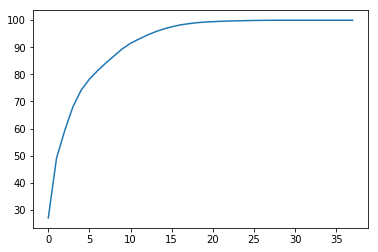

In [121]:
var_pca= pca.explained_variance_ratio_
cum_var_pca=np.cumsum(np.round(var_pca, decimals=4)*100)
plt.plot(cum_var_pca)

In [122]:
cum_var_pca

array([27.02, 49.06, 59.27, 68.07, 74.18, 78.23, 81.37, 84.19, 86.82,
       89.41, 91.46, 93.01, 94.42, 95.69, 96.72, 97.54, 98.21, 98.67,
       99.04, 99.28, 99.43, 99.57, 99.68, 99.75, 99.82, 99.88, 99.92,
       99.95, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96])

In [123]:
pca = PCA(n_components=11)
pca.fit(X_z)
X_pca = pca.fit_transform(X_z)

In [124]:
pca.fit(X_test_z)
X_pca_test = pca.fit_transform(X_test_z)

In [125]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=11)

In [126]:
DT.fit(X_pca,y)
Pred_pca =DT.predict(X_pca_test)